В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову. Загрузите ряд и постройте его график.

In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/chekhovana/courses/main/machine_learning/5_tasks/1_time_series/data/1.2_milk.csv'
data = pd.read_csv(path, ';', index_col=['month'], parse_dates=['month'], dayfirst=True)
data.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


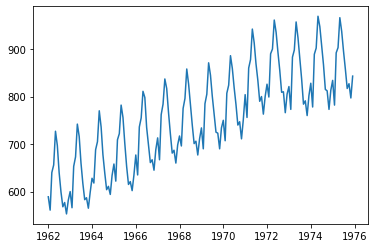

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data.index, data.milk)
plt.show()

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Чему равен полученный достигаемый уровень значимости?

In [ ]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(data.milk.values)[1]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.6274267086030314

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

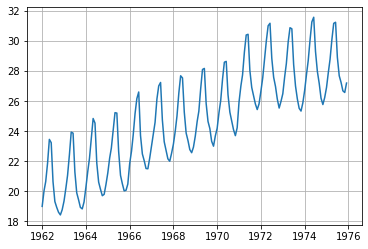

In [ ]:
data['dailymilk'] = data['milk'] / data.index.daysinmonth
data.head()
plt.plot(data.index, data.dailymilk)
plt.grid()
plt.show()

Рассчитайте сумму значений полученного показателя за весь период.

In [ ]:
data.dailymilk.sum()

4166.326661899466